In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
loans= pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#HANDLING CATEGORICAL DATA

In [4]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

x = loans.iloc[:, :-1].values 
y = loans.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[1 2 0.1189 ... 0 0 0]
 [1 1 0.1071 ... 0 0 0]
 [1 2 0.1357 ... 1 0 0]
 ...
 [0 2 0.1071 ... 8 0 0]
 [0 4 0.16 ... 5 0 0]
 [0 2 0.1392 ... 6 0 0]]


#GRAPHS

Text(0.5, 0, 'FICO')

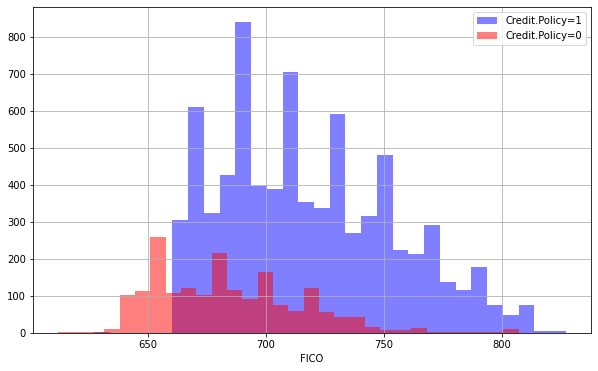

In [5]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

#NORMALIZING DATA

In [7]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#ALGORITHM

In [8]:
dt = DecisionTreeRegressor()

#FITTING OF TRAINING DATA

In [9]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [10]:
predictions = dt.predict(X_test)

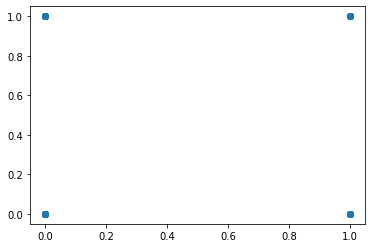

In [11]:
plt.scatter(y_test,predictions)

#EVALUATION

In [12]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,predictions))
print('Mean squared error is:', metrics.mean_squared_error(y_test,predictions))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean abolute error is: 0.2665274878218511
Mean squared error is: 0.2665274878218511
Root mean squared error is: 0.5162630025692826


In [14]:
print(metrics.accuracy_score(y_test, predictions))

0.7334725121781489


#SAVING THE MODEL USING PICKLE LIBRARY

In [15]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(dt) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_test) 


array([0., 1., 0., ..., 0., 0., 0.])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
y_train = y_train[0:2874]
print(confusion_matrix(y_train,predictions))

[[1943  474]
 [ 370   87]]


Precision, Recall, Support, Fscore

In [17]:
print(classification_report(y_train,predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2417
           1       0.16      0.19      0.17       457

    accuracy                           0.71      2874
   macro avg       0.50      0.50      0.50      2874
weighted avg       0.73      0.71      0.72      2874



#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [18]:
print(confusion_matrix(y_test,predictions))

[[1989  442]
 [ 324  119]]


Precision, Recall, Support, Fscore

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.21      0.27      0.24       443

    accuracy                           0.73      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.76      0.73      0.75      2874

